# DS 4420 Final Project: Data Visualization

Examines and visualizes the data from [Kaggle - Food.com](https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions/data?select=RAW_interactions.csv)


In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json
from datetime import datetime
import ast

### 1. Data Cleaning
Preprocessing and splitting data

In [ ]:
# load the data
users = pd.read_csv('data/PP_users.csv')
recipes = pd.read_csv('data/RAW_recipes.csv')
interactions = pd.read_csv('data/RAW_interactions.csv')

**a. Cleaning User Data**

In [3]:
# check shape
print('Shape:', users.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(users.u.value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(users.isna().astype(int).sum())

# dropping arbitrary columns
print('\nDropped Columns: n_items, techniques')
users.drop(['n_items', 'techniques'], axis=1, inplace=True)

# rename columns for consistency
users.rename(columns={'u':'user_id', 'items':'recipes'}, inplace=True)

# check datatypes
print('\nDatatypes:')
print(users.dtypes)

# display final shape
print('\nUsers Shape:', users.shape)
print('\n')

users.head()

Shape: (25076, 6)

Duplicates: 0

Null Values:
u             0
techniques    0
items         0
n_items       0
ratings       0
n_ratings     0
dtype: int64

Dropped Columns: n_items, techniques

Datatypes:
user_id       int64
recipes      object
ratings      object
n_ratings     int64
dtype: object

Users Shape: (25076, 4)




,user_id,recipes,ratings,n_ratings
0,0,"[1118, 27680, 32541, 137353, 16428, 28815, 658...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[122140, 77036, 156817, 76957, 68818, 155600, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[168054, 87218, 35731, 1, 20475, 9039, 124834,...","[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[163193, 156352, 102888, 19914, 169438, 55772,...","[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[72857, 38652, 160427, 55772, 119999, 141777, ...","[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


**b. Cleaning Recipe Data**

In [4]:
# check shape
print('Shape:', recipes.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(recipes.id.value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(recipes.isna().astype(int).sum())

# drop null name
recipes.dropna(subset='name', inplace=True)

# rename columns for consistency
recipes.rename(columns={'id':'recipe_id'}, inplace=True)

# check datatypes
print('\nDatatypes:')
print(recipes.dtypes)

# display final shape
print('\nRecipes Shape:', recipes.shape)
print('\n')

recipes.head()

Shape: (231637, 12)

Duplicates: 0

Null Values:
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

Datatypes:
name              object
recipe_id          int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

Recipes Shape: (231636, 12)




,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


**c. Cleaning Interactions Data**

In [5]:
# check shape
print('Shape:', interactions.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(interactions.groupby(['user_id','recipe_id']).count().reset_index()[['user_id','recipe_id']].value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(interactions.isna().astype(int).sum())

# check datatypes
print('\nDatatypes:')
print(interactions.dtypes)

# display final shape
print('\nInteractions Shape:', interactions.shape)
print('\n')

interactions.head()

Shape: (1132367, 5)

Duplicates: 0

Null Values:
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

Datatypes:
user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object

Interactions Shape: (1132367, 5)




,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


### Data preparation

In [6]:
# clean column names (ensuring they don't have trailing numbers)
interactions.columns = [col.rstrip('0123456789') for col in interactions.columns]
users.columns = [col.rstrip('0123456789') for col in users.columns]

# process string lists in users df
def parse_list_string(list_str):
    """Convert string representation of list to actual list"""
    if isinstance(list_str, str):
        try:
            return ast.literal_eval(list_str)
        except:
            return []
    return []

# apply parsing to recipes and ratings columns
users['recipes_list'] = users['recipes'].apply(parse_list_string)
users['ratings_list'] = users['ratings'].apply(parse_list_string)

# extract and flatten all ratings from users dataframe for analysis
all_user_ratings = []
for ratings in users['ratings_list']:
    if ratings:
        all_user_ratings.extend(ratings)

        

# count the number of ratings for each recipe
recipe_ratings_count = interactions['recipe_id'].value_counts().reset_index()
recipe_ratings_count.columns = ['recipe_id', 'rating_count']

# get the top 10 most rated recipes
top_10_recipes = recipe_ratings_count.head(10)

# merge with recipes dataframe to get the recipe names
top_10_recipes = top_10_recipes.merge(recipes[['recipe_id', 'name']], on='recipe_id', how='left')

### Data visualization

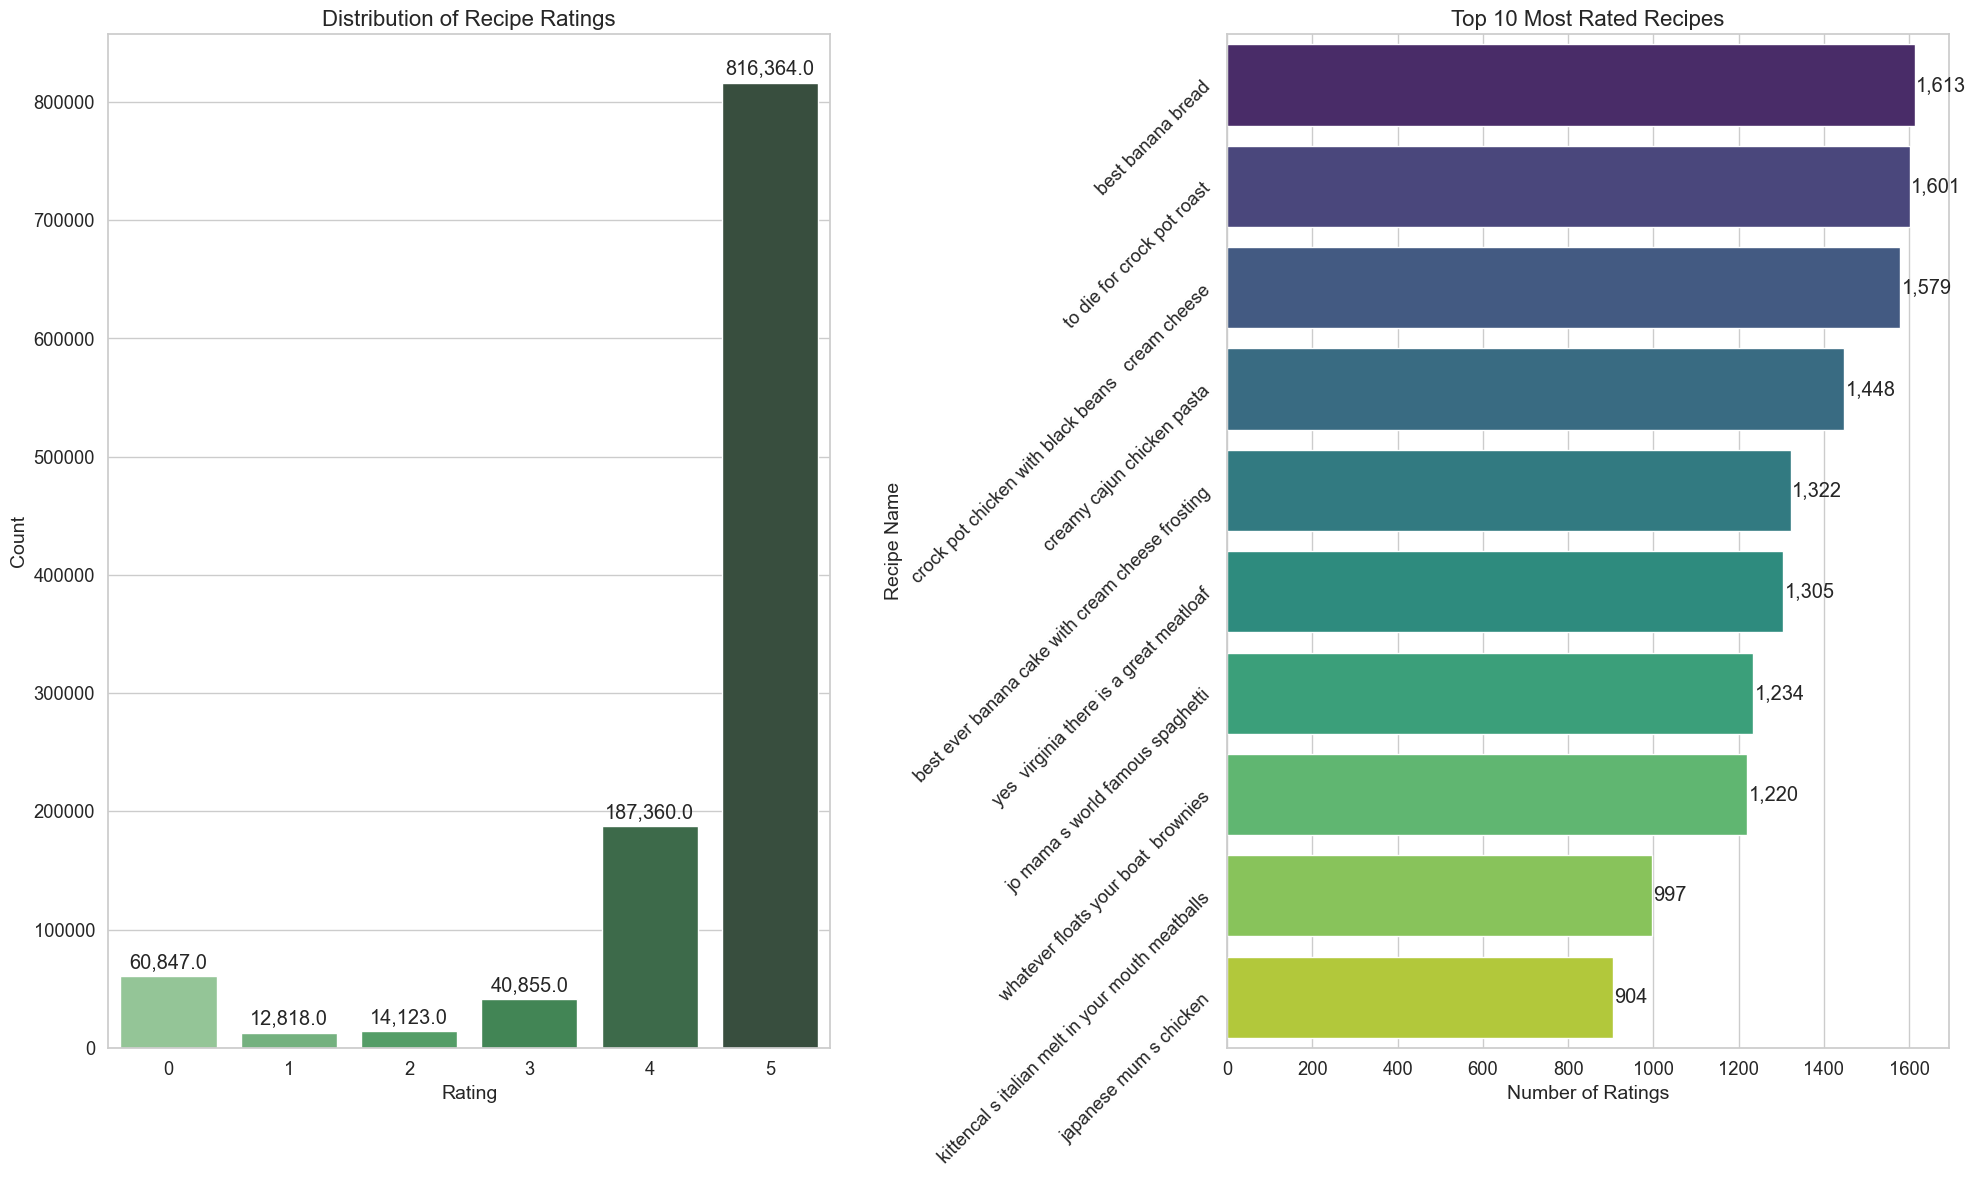

In [7]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
sns.set_palette("deep")


# create a figure with subplots
plt.figure(figsize=(20, 25))

# 1. distribution of ratings
plt.subplot(2, 2, 1)
ax1 = sns.countplot(x='rating', data=interactions, palette="Greens_d")

# add titles and labels
ax1.set_title('Distribution of Recipe Ratings', fontsize=16)
ax1.set_xlabel('Rating', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')


# 2. distribution of top rated recipes
plt.subplot(2, 2, 2)
chart = sns.barplot(x='rating_count', y='name', data=top_10_recipes, palette='viridis')

# add count labels to the bars
for i, v in enumerate(top_10_recipes['rating_count']):
    chart.text(v + 3, i, f"{v:,}", va='center')

# set titles and labels
plt.title('Top 10 Most Rated Recipes', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Recipe Name', fontsize=14)
plt.yticks(rotation=45)

plt.tight_layout()
plt.subplots_adjust(wspace=0.55, hspace=0.4)
plt.savefig('recipe_rating_analysis_1.png', dpi=300, bbox_inches='tight')

plt.show()